In [0]:
#Part 1 and 2

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab Notebooks/'  
"/content/gdrive/My Drive/Colab Notebooks/mnist_train.csv"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


'/content/gdrive/My Drive/Colab Notebooks/mnist_train.csv'

In [0]:
# Import Pandas for data manipulation using dataframes
import pandas as pd

#Import Numpy for statistical calculations
import numpy as np

# Import Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt

#Import train_test_split from scikit library
from sklearn.model_selection import train_test_split

# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [0]:
train_df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_train.csv',sep=',')
test_df  = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fashion-mnist_test.csv',sep=',')
test_df.shape

(10000, 785)

In [0]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')


x_train = train_data[:,1:]/255
y_train = train_data[:,0]

x_test= test_data[:,1:]/255
y_test=test_data[:,0]

x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

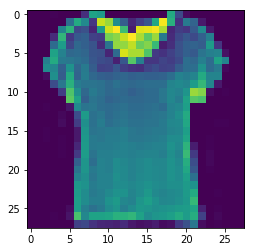

In [0]:
image = x_train[100,:].reshape((28,28))
plt.imshow(image)
plt.show()

In [0]:

image_rows = 28
image_cols = 28
batch_size = 512
image_shape = (image_rows,image_cols,1) 


In [0]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [0]:
print("x_train shape = {}".format(x_train.shape))
print("x_test shape = {}".format(x_test.shape))
print("x_validate shape = {}".format(x_validate.shape))

## **Data Agumentation**

8.0


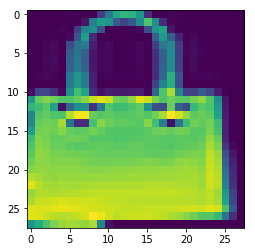

In [0]:

# Random Rotations
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')


datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=360,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

#datagen.fit(x_train)

for x_batch,y_batch in datagen.flow(x_train,y_train, batch_size=9):
  print(y_batch[5])
  image = x_batch[5,:].reshape((28,28))
  plt.imshow(image)
  plt.show()
  break
	


In [0]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

In [0]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [0]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=50,
    verbose=1,
    validation_data=(x_validate,y_validate)
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 84us/step - loss: 0.1430 - acc: 0.9473 - val_loss: 0.2380 - val_acc: 0.9178
Epoch 2/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1375 - acc: 0.9496 - val_loss: 0.2415 - val_acc: 0.9202
Epoch 3/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1345 - acc: 0.9509 - val_loss: 0.2457 - val_acc: 0.9172
Epoch 4/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1360 - acc: 0.9503 - val_loss: 0.2366 - val_acc: 0.9191
Epoch 5/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1315 - acc: 0.9517 - val_loss: 0.2465 - val_acc: 0.9180
Epoch 6/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1325 - acc: 0.9508 - val_loss: 0.2461 - val_acc: 0.9188
Epoch 7/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1303 - acc: 0.9514 - val_loss: 0.2497 - val_acc

In [0]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2369
Test Accuracy : 0.9221


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [0]:
#Get the predictions for the test data
predicted_classes = cnn_model.predict_classes(x_test)

#Get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [0]:
num_classes =10
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))


              precision    recall  f1-score   support

     Class 0       0.83      0.74      0.78      1000
     Class 1       0.96      0.94      0.95      1000
     Class 2       0.75      0.79      0.77      1000
     Class 3       0.75      0.92      0.82      1000
     Class 4       0.79      0.74      0.76      1000
     Class 5       0.93      0.90      0.92      1000
     Class 6       0.64      0.57      0.60      1000
     Class 7       0.88      0.89      0.89      1000
     Class 8       0.94      0.95      0.95      1000
     Class 9       0.91      0.94      0.92      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



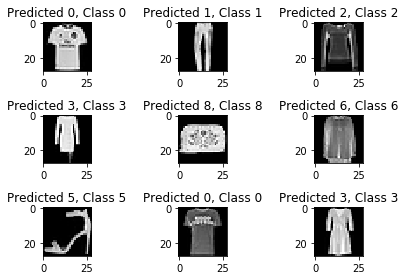

In [0]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

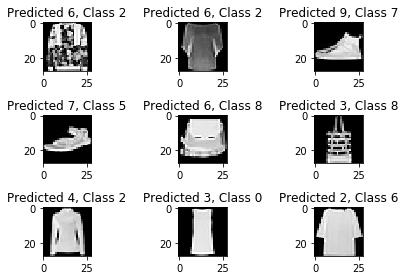

In [0]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()


Part 3

In [0]:
import os

In [0]:
name = '1_Layer'
cnn_model_1 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout'),
    Flatten(name='flatten'),
    Dense(32, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name = '2_Layer'
cnn_model_2 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', input_shape=image_shape, name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.2, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Flatten(name='flatten'),
    Dense(64, activation='relu', name='Dense'),
    Dense(10, activation='softmax', name='Output')
], name=name)

name='3_layer'
cnn_model_3 = Sequential([
    Conv2D(32, kernel_size=3, activation='relu', 
           input_shape=image_shape, kernel_initializer='he_normal', name='Conv2D-1'),
    MaxPooling2D(pool_size=2, name='MaxPool'),
    Dropout(0.25, name='Dropout-1'),
    Conv2D(64, kernel_size=3, activation='relu', name='Conv2D-2'),
    Dropout(0.25, name='Dropout-2'),
    Conv2D(128, kernel_size=3, activation='relu', name='Conv2D-3'),
    Dropout(0.4, name='Dropout-3'),
    Flatten(name='flatten'),
    Dense(128, activation='relu', name='Dense'),
    Dropout(0.4, name='Dropout'),
    Dense(10, activation='softmax', name='Output')
], name=name)

cnn_models = [cnn_model_1, cnn_model_2, cnn_model_3]

In [0]:
for model in cnn_models:
    model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D-1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
MaxPool (MaxPooling2D)       (None, 13, 13, 32)        0         
_________________________________________________________________
Dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
Dense (Dense)                (None, 32)                173088    
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
_________________________________________________________________
____

In [0]:
history_dict = {}

for model in cnn_models:
    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(),
        metrics=['accuracy']
    )
    
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=50, verbose=1,
        validation_data=(x_validate, y_validate)
    )
    
    history_dict[model.name] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 4s 74us/step - loss: 0.1378 - acc: 0.9495 - val_loss: 0.2417 - val_acc: 0.9176
Epoch 2/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.1335 - acc: 0.9516 - val_loss: 0.2427 - val_acc: 0.9193
Epoch 3/50
48000/48000 [==============================] - 2s 31us/step - loss: 0.1302 - acc: 0.9534 - val_loss: 0.2391 - val_acc: 0.9197
Epoch 4/50
48000/48000 [==============================] - 1s 31us/step - loss: 0.1285 - acc: 0.9537 - val_loss: 0.2507 - val_acc: 0.9179
Epoch 5/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1297 - acc: 0.9522 - val_loss: 0.2448 - val_acc: 0.9202
Epoch 6/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1241 - acc: 0.9547 - val_loss: 0.2485 - val_acc: 0.9183
Epoch 7/50
48000/48000 [==============================] - 2s 32us/step - loss: 0.1234 - acc: 0.9549 - val_loss: 0.2506 - val_acc

In [0]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)
print('Test Loss : {:.4f}'.format(score[0]))
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.4813
Test Accuracy : 0.8381


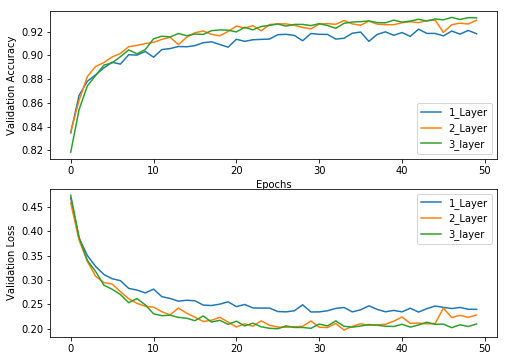

In [0]:
fig,(ax1,ax2)=plt.subplots(2,figsize=(8,6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)

ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
plt.show()
